In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
df = pd.read_excel("product_sales_data.xlsx")
df.head()


,Date,Region,Product,Quantity,UnitPrice,StoreLocation,CustomerType,Discount,Salesperson,TotalPrice,PaymentMethod,Promotion,Returned,OrderID,CustomerName,ShippingCost,OrderDate,DeliveryDate,RegionManager,Unnamed: 19
0,2023-02-23,East,Laptop,14,163.60,Store B,Wholesale,0.00,Eva,2290.400,Online,FREESHIP,0,REG100000,Cust 6583,43.34,2023-02-23,2023-02-27,Eric,NaN
1,2024-12-19,South,Phone,1,544.01,Store A,Retail,0.00,Alice,544.010,Gift Card,SAVE10,0,REG100001,Cust 2144,5.30,2024-12-19,2024-12-28,Sophie,NaN
2,2023-05-10,North,Desk,14,346.18,Store B,Wholesale,0.10,Alice,4361.868,Online,WINTER15,0,REG100002,Cust 5998,20.46,2023-05-10,2023-05-19,Ryan,NaN
3,2025-02-26,Central,Chair,18,384.82,Store A,Wholesale,0.15,Frank,5887.746,Gift Card,FREESHIP,0,REG100003,Cust 7136,27.95,2025-02-26,2025-03-02,Cameron,NaN
4,2023-06-24,East,Desk,18,237.76,Store C,Retail,0.00,Carlos,4279.680,Online,SAVE10,0,REG100004,Cust 6506,5.73,2023-06-24,2023-06-27,Eric,"COUNTROWS(FILTER('Sheet1', 'Sheet1'[DeliveryDa..."


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1500 non-null   datetime64[ns]
 1   Region         1500 non-null   object        
 2   Product        1500 non-null   object        
 3   Quantity       1500 non-null   int64         
 4   UnitPrice      1500 non-null   float64       
 5   StoreLocation  1500 non-null   object        
 6   CustomerType   1500 non-null   object        
 7   Discount       1500 non-null   float64       
 8   Salesperson    1500 non-null   object        
 9   TotalPrice     1500 non-null   float64       
 10  PaymentMethod  1500 non-null   object        
 11  Promotion      1130 non-null   object        
 12  Returned       1500 non-null   int64         
 13  OrderID        1500 non-null   object        
 14  CustomerName   1500 non-null   object        
 15  ShippingCost   1500 n

Date                0
Region              0
Product             0
Quantity            0
UnitPrice           0
StoreLocation       0
CustomerType        0
Discount            0
Salesperson         0
TotalPrice          0
PaymentMethod       0
Promotion         370
Returned            0
OrderID             0
CustomerName        0
ShippingCost        0
OrderDate           0
DeliveryDate        0
RegionManager       0
Unnamed: 19      1499
dtype: int64

In [4]:
df = df.drop(columns=['Unnamed: 19'])


In [5]:
df['Promotion'] = df['Promotion'].fillna('No Promotion')


In [6]:
df["OrderDate"] = pd.to_datetime(df["OrderDate"])
df["DeliveryDate"] = pd.to_datetime(df["DeliveryDate"])
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["OrderDate"].dt.year
df["YearMonth"] = df["OrderDate"].dt.to_period("M").astype(str)


In [7]:
df["DeliveryDays"] = (df["DeliveryDate"] - df["OrderDate"]).dt.days
df["IsLate"] = (df["DeliveryDays"] > 5).astype(int)


In [22]:
total_sales = df['TotalPrice'].sum()
print("Total Sales:", total_sales)

total_orders = df['OrderID'].nunique()
print("Total Orders:", total_orders)

avg_discount = df['Discount'].mean()
print("Average Discount:", avg_discount)

avg_delivery = df['DeliveryDays'].mean()
print("Average Delivery Time (days):", avg_delivery)


Total Sales: 4379992.4285
Total Orders: 1500
Average Discount: 0.07313333333333334
Average Delivery Time (days): 6.042666666666666


In [ ]:
df.groupby("Region")["TotalPrice"].sum()


In [23]:
sales_by_year = df.groupby(df['OrderDate'].dt.year)['TotalPrice'].sum()
print("Sales by Year:\n", sales_by_year)


Sales by Year:
 OrderDate
2023    1.697870e+06
2024    1.771955e+06
2025    9.101677e+05
Name: TotalPrice, dtype: float64


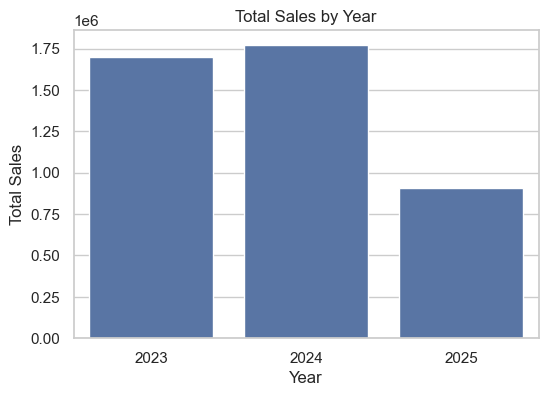

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_year.index, y=sales_by_year.values)
plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()


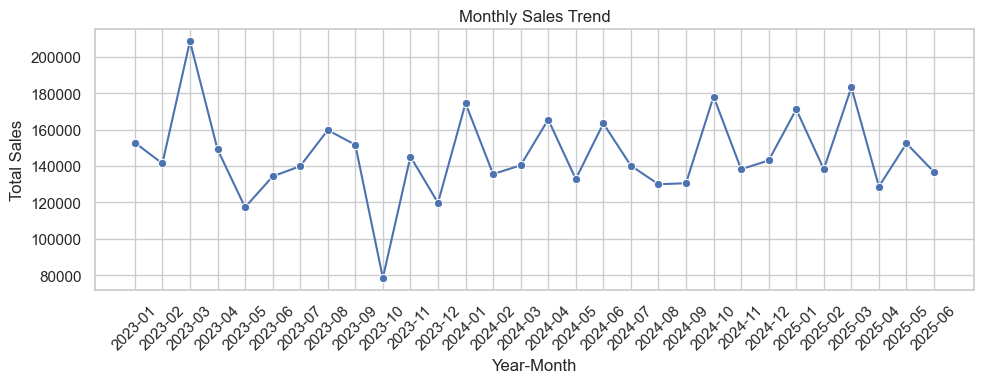

In [12]:
monthly_sales = df.groupby("YearMonth")["TotalPrice"].sum().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly_sales, x="YearMonth", y="TotalPrice", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


Customer insights
This section analyzes performance by customer type and identifies key customers.

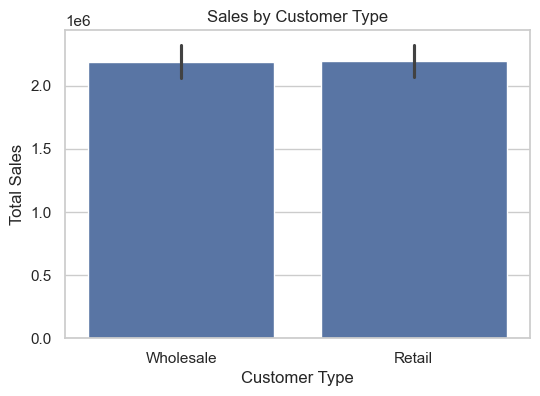

Sales by Customer Type:
 CustomerType
Retail       2.195526e+06
Wholesale    2.184467e+06
Name: TotalPrice, dtype: float64


In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="CustomerType", y="TotalPrice", estimator=sum)
plt.title("Sales by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()
sales_by_customer_type = df.groupby("CustomerType")["TotalPrice"].sum()
print("Sales by Customer Type:\n", sales_by_customer_type)


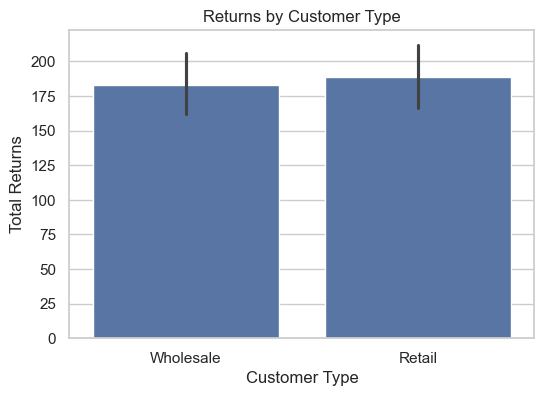

Returns by Customer Type:
 CustomerType
Retail       189
Wholesale    183
Name: Returned, dtype: int64


In [25]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="CustomerType", y="Returned", estimator=sum)
plt.title("Returns by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Returns")
plt.show()

returns_by_customer_type = df.groupby("CustomerType")["Returned"].sum()
print("Returns by Customer Type:\n", returns_by_customer_type)



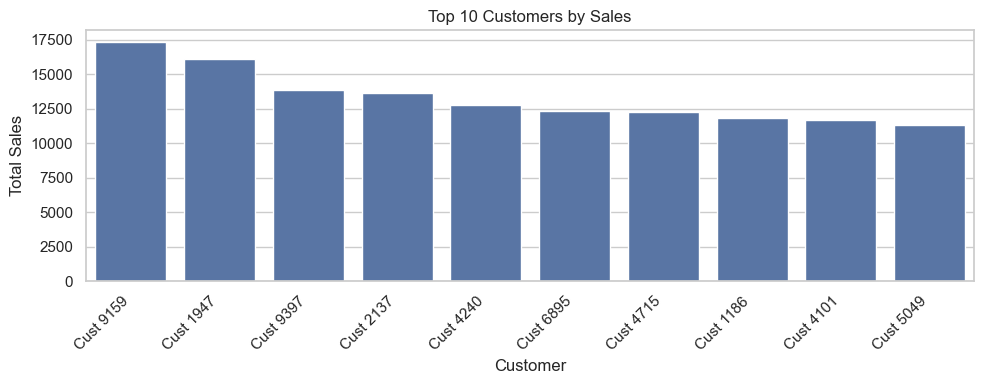

Top 10 Customers by Sales:
 CustomerName
Cust 9159    17313.6040
Cust 1947    16087.4420
Cust 9397    13842.9810
Cust 2137    13668.3920
Cust 4240    12743.7040
Cust 6895    12313.2500
Cust 4715    12244.2300
Cust 1186    11826.3315
Cust 4101    11678.8360
Cust 5049    11287.4580
Name: TotalPrice, dtype: float64


In [26]:
top_customers = (
    df.groupby("CustomerName")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,4))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

top_customers = (
    df.groupby("CustomerName")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("Top 10 Customers by Sales:\n", top_customers)



Page 3: Salesperson & Store Performance


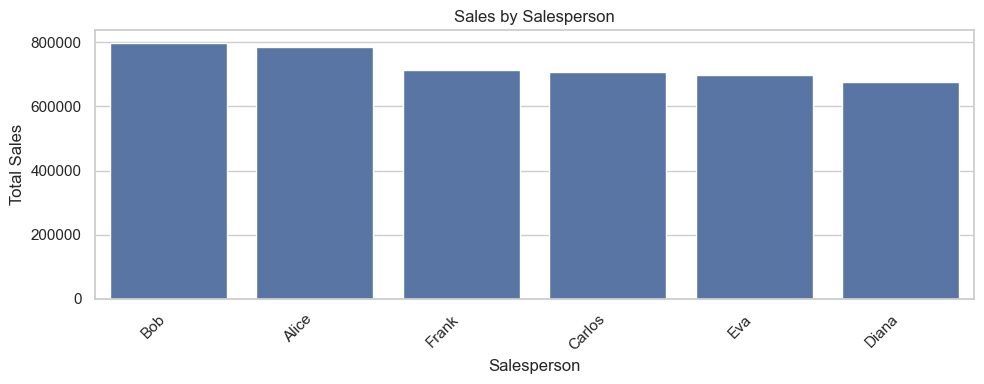

Sales by Salesperson:
 Salesperson
Alice     786165.8400
Bob       796780.5215
Carlos    707166.7160
Diana     676568.2495
Eva       698669.5795
Frank     714641.5220
Name: TotalPrice, dtype: float64


In [27]:
sales_by_sp = df.groupby("Salesperson")["TotalPrice"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=sales_by_sp.index, y=sales_by_sp.values)
plt.xticks(rotation=45, ha="right")
plt.title("Sales by Salesperson")
plt.xlabel("Salesperson")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

sales_by_sp = df.groupby("Salesperson")["TotalPrice"].sum()
print("Sales by Salesperson:\n", sales_by_sp)


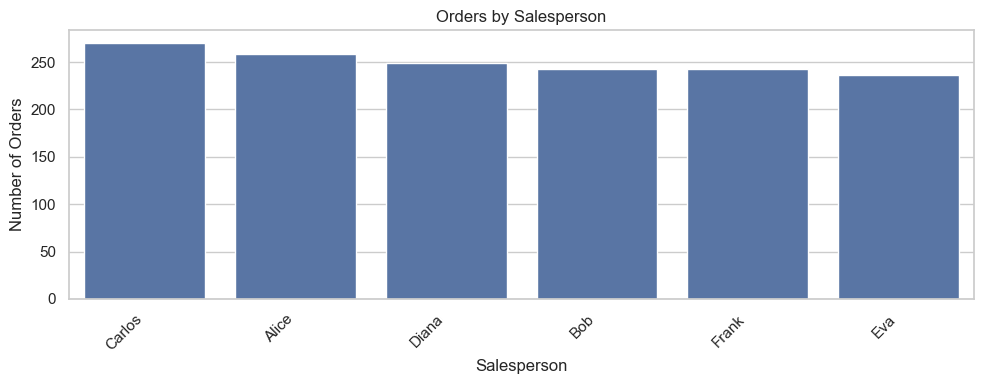

Orders by Salesperson:
 Salesperson
Alice     259
Bob       243
Carlos    270
Diana     249
Eva       236
Frank     243
Name: OrderID, dtype: int64


In [28]:
orders_by_sp = df.groupby("Salesperson")["OrderID"].count().sort_values(ascending=False)

plt.figure(figsize=(10,4))
sns.barplot(x=orders_by_sp.index, y=orders_by_sp.values)
plt.xticks(rotation=45, ha="right")
plt.title("Orders by Salesperson")
plt.xlabel("Salesperson")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

orders_by_sp = df.groupby("Salesperson")["OrderID"].count()
print("Orders by Salesperson:\n", orders_by_sp)



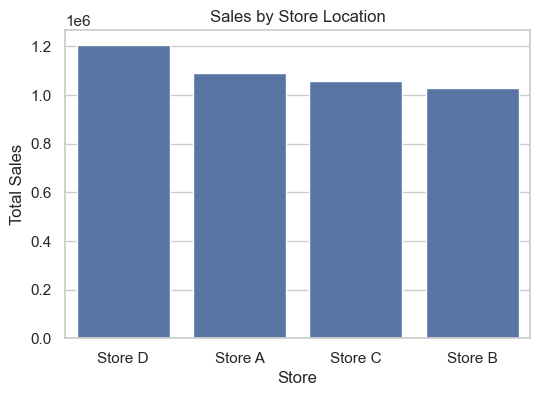

In [18]:
sales_by_store = df.groupby("StoreLocation")["TotalPrice"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=sales_by_store.index, y=sales_by_store.values)
plt.title("Sales by Store Location")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


Delivery & Returns Analysis

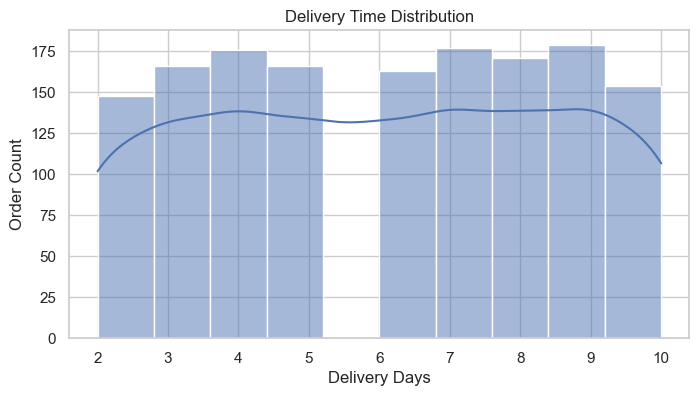

Sample DeliveryDays values:
 0    4
1    9
2    9
3    4
4    3
Name: DeliveryDays, dtype: int64


In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df["DeliveryDays"], bins=10, kde=True)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Days")
plt.ylabel("Order Count")
plt.show()

print("Sample DeliveryDays values:\n", df["DeliveryDays"].head())


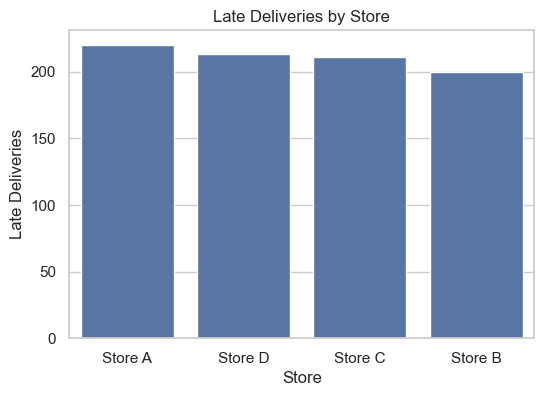

Late Deliveries by Store:
 StoreLocation
Store A    220
Store B    200
Store C    211
Store D    213
Name: IsLate, dtype: int32


In [30]:
late_by_store = df.groupby("StoreLocation")["IsLate"].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=late_by_store.index, y=late_by_store.values)
plt.title("Late Deliveries by Store")
plt.xlabel("Store")
plt.ylabel("Late Deliveries")
plt.show()


late_by_store = df.groupby("StoreLocation")["IsLate"].sum()
print("Late Deliveries by Store:\n", late_by_store)


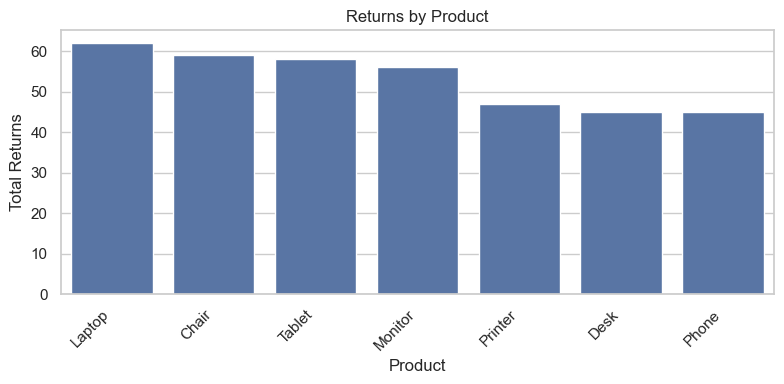

Returns by Product:
 Product
Chair      59
Desk       45
Laptop     62
Monitor    56
Phone      45
Printer    47
Tablet     58
Name: Returned, dtype: int64


In [31]:
returns_by_product = df.groupby("Product")["Returned"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=returns_by_product.index, y=returns_by_product.values)
plt.title("Returns by Product")
plt.xlabel("Product")
plt.ylabel("Total Returns")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

returns_by_product = df.groupby("Product")["Returned"].sum()
print("Returns by Product:\n", returns_by_product)



In [32]:
returns_by_region = df.groupby("Region")["Returned"].sum()
print("Returns by Region:\n", returns_by_region)


Returns by Region:
 Region
Central    70
East       81
North      70
South      77
West       74
Name: Returned, dtype: int64


Overall Insights Summary
Sales performance: North leads in total sales, while South is the weakest region.

Customer behavior: Laptops, chairs, and tablets show the highest return counts, suggesting potential quality or expectation issues.

Sales team & stores: A few salespeople and stores drive a large share of revenue, indicating key performers.

Delivery performance: Average delivery time is about 6 days, with late deliveries spread across all stores, pointing to system-level delivery challenges rather than a single-location problem.

Returns & delivery: High-return products combined with delivery performance can help target process improvements and customer experience initiatives.